### Пет-проект на тему 
### *Распознавание рукописных цифр с помощью обучения нейронной сети с одним скрытым слоем*


```
Импорт библиотек tensorflow, keras, seaborn, numpy & matplotlib
```

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

```
Импорт стандартного датасета библиотеки Keras для практики над распознаванием рукописного текста в 4 массива
```

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

```
Формат входных данных типа X - матрицы размером 28x28, каждая ячейка которых содержит число (0-255), отражающее степень закрашенности соответствующего квадрата пикселями цифры
Формат входных данных типа y - одномерный массив с реальными значениями цифр
```

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_train[0][:2]   # первые 2 строки первой матрицы

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=uint8)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

```
Нормализация значений в массивах данных, до нормализации они лежат в диапазоне 0-255
```

In [7]:
X_train = X_train / 255
X_test = X_test / 255

```
2 метода визуализации входных данных
```

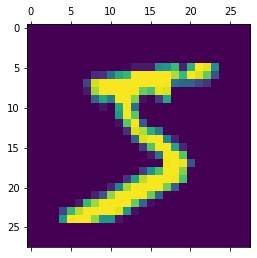

In [8]:
plt.matshow(X_train[0])

<AxesSubplot:>

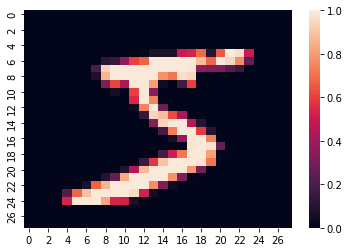

In [9]:
sns.heatmap(X_train[0])

```
Преобразование входных данных из двумерных массивов в одномерные
```

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_test_flattened.shape

(10000, 784)

```
ПОСТРОЕНИЕ НЕЙРОННОЙ СЕТИ
- .Sequential() предоставляет возможность создавать слои нейронов и работать с ними,
- .layers.Dense() создает связь слоев (и сами слои, если их еще нет) нейронной сети: 
    первый параметр - количество выходных слоев, 
    input_shape - размерность входного слоя, 
    activation - активационная функция нейронов в этом слое,  
- .compile() - необходимый метод для формирования нейронной сети: 
    optimizer - выбор метода оптимизации работы нейросети, loss - то, что должна минимизировать модель в ходе обучения, 
    metrics - критерий, по которому будет вестись оценка эффективности модели,
- .fit() обучение нейронной сети на выбранном датасете: 
    epochs - сколько раз будет перебран весь датасет
```

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')
])

model.compile(optimizer = 'adam',  
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4676 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2729 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2660 - accuracy: 0.9266


```
Аналог .score() из sklearn, проверка эффективности модели на заданных входных и выходных данных
```

In [13]:
model.evaluate(X_test_flattened, y_test)   # == .score()

313/313 [==============================] - 0s 1ms/step - loss: 0.2670 - accuracy: 0.9257


[0.2670382857322693, 0.9257000088691711]

<AxesSubplot:>

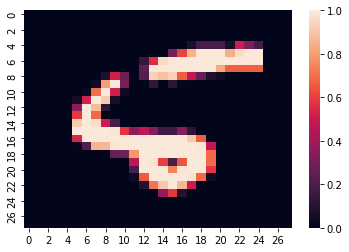

In [14]:
sns.heatmap(X_test[8], annot=False)

```
Результат работы нейросети - распознавание введенного набора пикселей и вывод конкретной цифры
```

In [15]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 941us/step


In [16]:
np.argmax(y_predicted[8])

6

In [17]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [18]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

```
Формирование confusion matrix - матрицы, показывающей совпадение/различие реальных значений и предсказанных
```

In [20]:
cm = tf.math.confusion_matrix(labels = y_test,
                        predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    1,    2,    0,   10,    6,    3,    3,    1],
       [   0, 1116,    2,    2,    0,    1,    4,    2,    8,    0],
       [   4,   10,  925,   16,    6,    5,   12,   11,   39,    4],
       [   1,    0,   17,  933,    0,   23,    2,   12,   15,    7],
       [   1,    1,    4,    2,  914,    0,   10,    5,   11,   34],
       [   7,    3,    3,   37,    6,  785,   12,    5,   29,    5],
       [   8,    3,    5,    1,    7,   21,  908,    2,    3,    0],
       [   1,    5,   20,    8,    6,    1,    0,  954,    4,   29],
       [   5,   11,    6,   29,    9,   34,    9,   11,  854,    6],
       [   9,    7,    1,   13,   25,    8,    0,   25,    7,  914]])>

```
Визуализация confusion matrix
```

Text(69.0, 0.5, 'Truth')

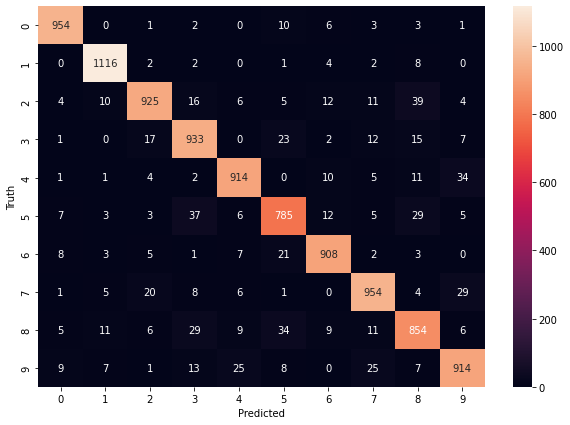

In [21]:
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

```
Формирование нейросети с одним скрытым слоем из 100 нейронов и активационной функцией ReLu
```

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784, ), activation = 'relu'),
#     Если мы не хотим заранее 'выпрямлять' входной массив, то можно использовать конструкцию ниже вместо первого слоя. 
#     Тогда в .fit() будет (X_train, y_train, epochs = 5)
    
#     keras.layers.Flatten(input_shape = (28, 28)),  
#     keras.layers.Dense(100, activation = 'relu'), 
    
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2738 - accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1249 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0884 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0678 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0529 - accuracy: 0.9836


In [23]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0768 - accuracy: 0.9755


[0.07681219279766083, 0.9754999876022339]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

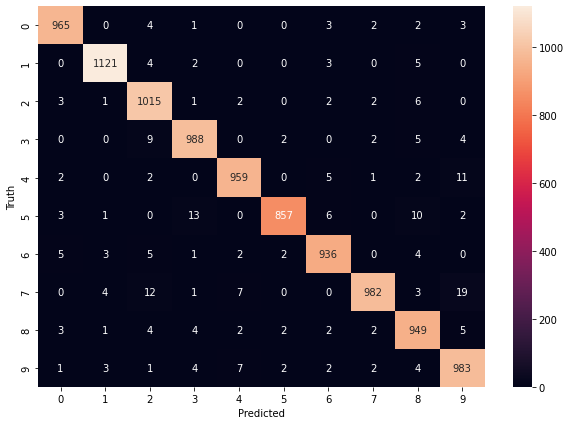

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test,
                        predictions = y_predicted_labels)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

```
Как видно из confusion matrix выше, эта нейронная сеть номного эффективнее справляется с задачей
```